In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})


In [2]:
movie = pd.read_csv('project_data/나홀로 영화 버즈량.csv', encoding='cp949')
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ)
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1
2,20190731,블로그커뮤니티,송파,중구,영화,1
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1
...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2


In [3]:
#movie['행정구(GU_NM)'] = np.where(movie['행정구(GU_NM)'] == '서울', np.nan, movie['행정구(GU_NM)'])

In [4]:
movie = movie.dropna()

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DOC_DATE(DATE)         500 non-null    int64 
 1   수집소스(SOURCE)           500 non-null    object
 2   행정동(DONG_NM)           500 non-null    object
 3   행정구(GU_NM)             500 non-null    object
 4   세부키워드(KEYWORD_DETAIL)  500 non-null    object
 5   FREQ(FREQ)             500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [6]:
movie_KN = movie.groupby(movie['세부키워드(KEYWORD_DETAIL)'], as_index=False)\
                .agg(keyword_n = ('세부키워드(KEYWORD_DETAIL)','count'))\
                .sort_values('keyword_n', ascending=False)
movie_KN

,세부키워드(KEYWORD_DETAIL),keyword_n
10,영화,196
0,cgv,67
12,영화관,57
2,극장,30
6,메가박스,28
4,롯데시네마,26
15,영화보기,17
1,개봉,16
5,매표소,15
16,영화보러,9


<AxesSubplot:xlabel='keyword_n', ylabel='세부키워드(KEYWORD_DETAIL)'>

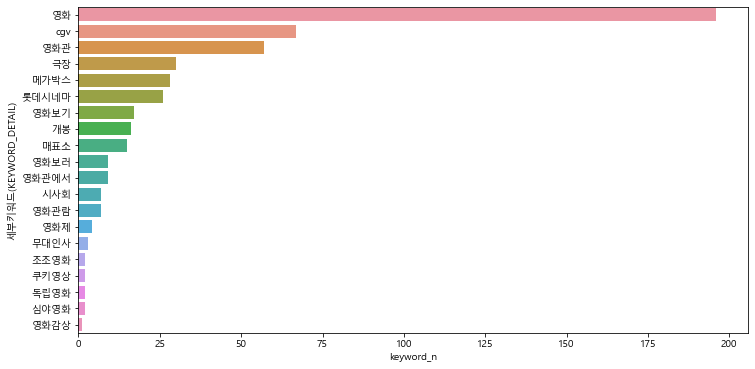

In [35]:
plt.figure(figsize = (12, 6))
sns.barplot(data = movie_KN, y = '세부키워드(KEYWORD_DETAIL)', x = 'keyword_n')

In [8]:
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ)
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1
2,20190731,블로그커뮤니티,송파,중구,영화,1
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1
...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2


In [9]:
movie_vcc = movie.groupby('행정구(GU_NM)', as_index=False).agg(movie_vc = ('행정구(GU_NM)','count'))
movie_vcc['핫플'] = np.where(movie_vcc['movie_vc'] >= 22, '핫플레이스',np.where(movie_vcc['movie_vc'] >= 14, '로데오거리','한적한 곳'))
movie_vcc.sort_values('movie_vc', ascending=False)

,행정구(GU_NM),movie_vc,핫플
0,강남구,67,핫플레이스
22,종로구,52,핫플레이스
20,용산구,51,핫플레이스
13,서울,44,핫플레이스
11,마포구,43,핫플레이스
23,중구,32,핫플레이스
17,송파구,22,핫플레이스
19,영등포구,21,로데오거리
5,광진구,20,로데오거리
14,서초구,18,로데오거리


In [10]:
movie['행정구언급량'] = movie_vcc['movie_vc']

In [11]:
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),행정구언급량
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1,67.0
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1,9.0
2,20190731,블로그커뮤니티,송파,중구,영화,1,5.0
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1,4.0
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1,13.0
...,...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1,NaN
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1,NaN
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2,NaN
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2,NaN


In [12]:
movie1 = pd.merge(left = movie_vcc, right = movie, how = 'right',on='행정구(GU_NM)')

In [13]:
movie1

,행정구(GU_NM),movie_vc,핫플,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),행정구언급량
0,서울,44,핫플레이스,20190625,블로그커뮤니티,샤로수길,영화,1,67.0
1,광진구,20,로데오거리,20170731,블로그커뮤니티,가로수길,롯데시네마,1,9.0
2,중구,32,핫플레이스,20190731,블로그커뮤니티,송파,영화,1,5.0
3,송파구,22,핫플레이스,20180108,블로그커뮤니티,영등포역,영화관람,1,4.0
4,마포구,43,핫플레이스,20170121,블로그커뮤니티,파르나스몰,영화관에서,1,13.0
...,...,...,...,...,...,...,...,...,...
495,중구,32,핫플레이스,20170615,블로그커뮤니티,월드컵경기장,cgv,1,NaN
496,종로구,52,핫플레이스,20181205,블로그커뮤니티,국립박물관,롯데시네마,1,NaN
497,은평구,4,한적한 곳,20171025,블로그커뮤니티,신도림롯데시네마,영화관,2,NaN
498,중랑구,8,한적한 곳,20190901,블로그커뮤니티,이태원,영화관람,2,NaN


In [14]:
movie1['행정구언급량'] = movie1['movie_vc']
movie1

,행정구(GU_NM),movie_vc,핫플,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),행정구언급량
0,서울,44,핫플레이스,20190625,블로그커뮤니티,샤로수길,영화,1,44
1,광진구,20,로데오거리,20170731,블로그커뮤니티,가로수길,롯데시네마,1,20
2,중구,32,핫플레이스,20190731,블로그커뮤니티,송파,영화,1,32
3,송파구,22,핫플레이스,20180108,블로그커뮤니티,영등포역,영화관람,1,22
4,마포구,43,핫플레이스,20170121,블로그커뮤니티,파르나스몰,영화관에서,1,43
...,...,...,...,...,...,...,...,...,...
495,중구,32,핫플레이스,20170615,블로그커뮤니티,월드컵경기장,cgv,1,32
496,종로구,52,핫플레이스,20181205,블로그커뮤니티,국립박물관,롯데시네마,1,52
497,은평구,4,한적한 곳,20171025,블로그커뮤니티,신도림롯데시네마,영화관,2,4
498,중랑구,8,한적한 곳,20190901,블로그커뮤니티,이태원,영화관람,2,8


In [15]:
del movie1['FREQ(FREQ)']

In [16]:
movie1 = pd.merge(left = movie_KN, right = movie1, how = 'left', on = '세부키워드(KEYWORD_DETAIL)')

In [17]:
movie1

,세부키워드(KEYWORD_DETAIL),keyword_n,행정구(GU_NM),movie_vc,핫플,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구언급량
0,영화,196,서울,44,핫플레이스,20190625,블로그커뮤니티,샤로수길,44
1,영화,196,중구,32,핫플레이스,20190731,블로그커뮤니티,송파,32
2,영화,196,용산구,51,핫플레이스,20191029,블로그커뮤니티,월드컵경기장,51
3,영화,196,종로구,52,핫플레이스,20171229,블로그커뮤니티,용산,52
4,영화,196,중구,32,핫플레이스,20170131,블로그커뮤니티,등촌동,32
...,...,...,...,...,...,...,...,...,...
495,독립영화,2,동작구,14,로데오거리,20170212,블로그커뮤니티,타임스퀘어cgv,14
496,독립영화,2,강남구,67,핫플레이스,20180727,블로그커뮤니티,강동,67
497,심야영화,2,강남구,67,핫플레이스,20171009,블로그커뮤니티,익선동,67
498,심야영화,2,동대문구,2,한적한 곳,20171014,블로그커뮤니티,서울,2


In [18]:
movie1['키워드언급량'] = movie1['keyword_n']

In [19]:
movie1 = movie1[['DOC_DATE(DATE)','수집소스(SOURCE)','행정구(GU_NM)','행정구언급량','세부키워드(KEYWORD_DETAIL)','키워드언급량','핫플']]
movie1

,DOC_DATE(DATE),수집소스(SOURCE),행정구(GU_NM),행정구언급량,세부키워드(KEYWORD_DETAIL),키워드언급량,핫플
0,20190625,블로그커뮤니티,서울,44,영화,196,핫플레이스
1,20190731,블로그커뮤니티,중구,32,영화,196,핫플레이스
2,20191029,블로그커뮤니티,용산구,51,영화,196,핫플레이스
3,20171229,블로그커뮤니티,종로구,52,영화,196,핫플레이스
4,20170131,블로그커뮤니티,중구,32,영화,196,핫플레이스
...,...,...,...,...,...,...,...
495,20170212,블로그커뮤니티,동작구,14,독립영화,2,로데오거리
496,20180727,블로그커뮤니티,강남구,67,독립영화,2,핫플레이스
497,20171009,블로그커뮤니티,강남구,67,심야영화,2,핫플레이스
498,20171014,블로그커뮤니티,동대문구,2,심야영화,2,한적한 곳


In [20]:
movie_gangnam = movie1.groupby('행정구(GU_NM)',as_index=False).agg(gangnam_n = ('세부키워드(KEYWORD_DETAIL)','count'))
movie_gangnam

,행정구(GU_NM),gangnam_n
0,강남구,67
1,강동구,9
2,강북구,5
3,강서구,4
4,관악구,13
5,광진구,20
6,구로구,14
7,노원구,7
8,도봉구,4
9,동대문구,2


In [21]:
movie1 = movie1.sort_values('DOC_DATE(DATE)', ascending=False,)
movie1.reset_index(drop=True)

,DOC_DATE(DATE),수집소스(SOURCE),행정구(GU_NM),행정구언급량,세부키워드(KEYWORD_DETAIL),키워드언급량,핫플
0,20191226,블로그커뮤니티,용산구,51,cgv,67,핫플레이스
1,20191226,블로그커뮤니티,서초구,18,영화,196,로데오거리
2,20191223,블로그커뮤니티,영등포구,21,영화,196,로데오거리
3,20191222,블로그커뮤니티,구로구,14,영화,196,로데오거리
4,20191216,블로그커뮤니티,서울,44,영화,196,핫플레이스
...,...,...,...,...,...,...,...
495,20170121,블로그커뮤니티,관악구,13,영화,196,한적한 곳
496,20170121,블로그커뮤니티,마포구,43,영화관에서,9,핫플레이스
497,20170119,블로그커뮤니티,강남구,67,메가박스,28,핫플레이스
498,20170109,트위터,용산구,51,극장,30,핫플레이스


In [22]:
text_movie = movie1[['세부키워드(KEYWORD_DETAIL)', '키워드언급량']]
text_movie

,세부키워드(KEYWORD_DETAIL),키워드언급량
251,cgv,67
27,영화,196
191,영화,196
179,영화,196
168,영화,196
...,...,...
60,영화,196
461,영화관에서,9
356,메가박스,28
331,극장,30


<AxesSubplot:xlabel='키워드언급량', ylabel='세부키워드(KEYWORD_DETAIL)'>

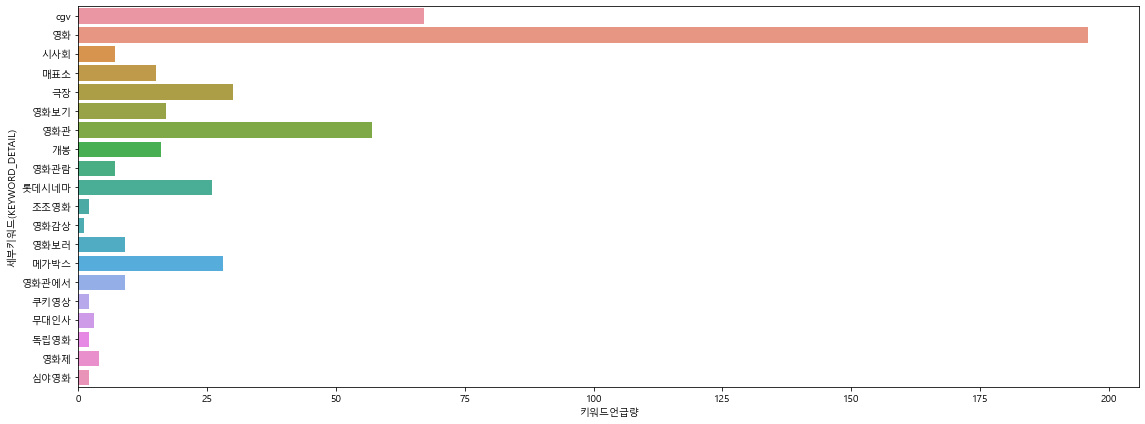

In [23]:
# 전체 구역에서 키워드언급량
plt.figure(figsize = (19, 7))
sns.barplot(data=text_movie, y='세부키워드(KEYWORD_DETAIL)', x = '키워드언급량')

In [24]:
movie1=movie1.reset_index(drop=True)

In [25]:
movie1

,DOC_DATE(DATE),수집소스(SOURCE),행정구(GU_NM),행정구언급량,세부키워드(KEYWORD_DETAIL),키워드언급량,핫플
0,20191226,블로그커뮤니티,용산구,51,cgv,67,핫플레이스
1,20191226,블로그커뮤니티,서초구,18,영화,196,로데오거리
2,20191223,블로그커뮤니티,영등포구,21,영화,196,로데오거리
3,20191222,블로그커뮤니티,구로구,14,영화,196,로데오거리
4,20191216,블로그커뮤니티,서울,44,영화,196,핫플레이스
...,...,...,...,...,...,...,...
495,20170121,블로그커뮤니티,관악구,13,영화,196,한적한 곳
496,20170121,블로그커뮤니티,마포구,43,영화관에서,9,핫플레이스
497,20170119,블로그커뮤니티,강남구,67,메가박스,28,핫플레이스
498,20170109,트위터,용산구,51,극장,30,핫플레이스


In [26]:
movie1.groupby('행정구(GU_NM)').agg(n = ('핫플','count')).sort_values('n',ascending=False).head(6)

,n
행정구(GU_NM),
강남구,67
종로구,52
용산구,51
서울,44
마포구,43
중구,32


In [27]:
font = 'DoHyeon-Regular.ttf'

In [28]:
textm_movie = text_movie.set_index('세부키워드(KEYWORD_DETAIL)').to_dict()['키워드언급량']
textm_movie

{'cgv': 67,
 '영화': 196,
 '시사회': 7,
 '매표소': 15,
 '극장': 30,
 '영화보기': 17,
 '영화관': 57,
 '개봉': 16,
 '영화관람': 7,
 '롯데시네마': 26,
 '조조영화': 2,
 '영화감상': 1,
 '영화보러': 9,
 '메가박스': 28,
 '영화관에서': 9,
 '쿠키영상': 2,
 '무대인사': 3,
 '독립영화': 2,
 '영화제': 4,
 '심야영화': 2}

In [29]:
import PIL
icon = PIL.Image.open('project_data/2015-06-22-seoul.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

In [30]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
               font_path = font,
              width = 400,
              height = 400,
              background_color='white',
              colormap = 'Paired')

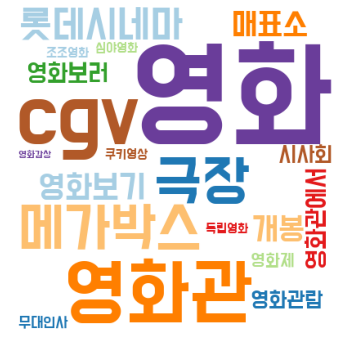

In [31]:
img_wordcloud = wc.generate_from_frequencies(textm_movie)
plt.figure(figsize = (6, 6))
plt.axis('off')
plt.imshow(img_wordcloud)